In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor

In [2]:
##California House Pricing Dataset
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

C:\Users\AKSHTA\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)
df['Target']=california_df.target

In [5]:
df.shape

(20640, 9)

In [6]:
## Taking Sample Data
df=df.sample(frac=0.25)

In [7]:
df.shape

(5160, 9)

In [9]:
#independent features
X=df.iloc[:,:-1]
#dependent features
y=df.iloc[:,-1]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10523,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70
11248,3.7059,17.0,5.199029,1.058252,946.0,2.296117,33.81,-118.00
10643,7.8660,36.0,6.656958,1.064725,658.0,2.129450,33.56,-117.79
19618,3.1645,37.0,6.345794,1.079439,586.0,2.738318,37.52,-121.14
19516,1.3036,52.0,9.136364,1.590909,74.0,3.363636,37.64,-121.01


In [10]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [12]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [14]:
y_pred=regressor.predict(X_test)
y_pred

array([2.92 , 1.214, 1.683, ..., 2.917, 1.27 , 2.841])

In [15]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
score

0.4929672925024631

In [16]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']
    
}
regressor=DecisionTreeRegressor()

In [17]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [18]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [19]:
regressorcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'random'}

In [29]:
regressor = DecisionTreeRegressor(criterion='mae', max_depth=7, max_features='auto', splitter='best')
regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mae', max_depth=7, max_features='auto')

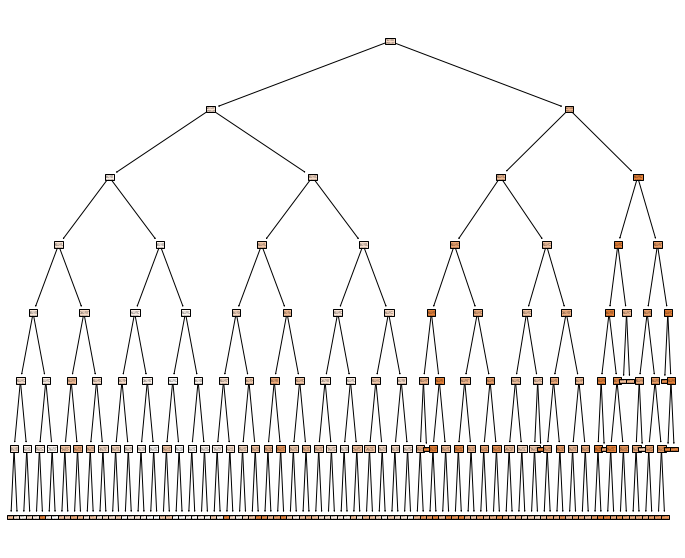

In [30]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)
plt.show()